# Confidence Interval 

In [34]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np 
import random 
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
sns.set(rc={'figure.figsize':(13, 7.5)})

In [36]:
np.random.seed(42) #seed itu randomnya dikunci jadi bisa dikontrol

normal_distribution_male_mass_pound = np.random.normal(loc=181, scale=24, size=6000)


In [37]:
normal_distribution_male_mass_pound

array([192.92113967, 177.68165677, 196.54452491, ..., 151.78230896,
       192.23081013, 152.91326305])

In [38]:
normal_distribution_female_mass_pound = np.random.normal(loc=132, scale=22, size=6500)

In [39]:
all_mass_value = np.concatenate((normal_distribution_female_mass_pound, normal_distribution_female_mass_pound), axis = 0)

In [40]:
all_mass_value

array([107.49021012, 118.11952166, 111.27467596, ..., 148.4088434 ,
       127.93855812, 106.53031567])

In [41]:
df_ppl_mass = pd.DataFrame(data={'mass_pounds': all_mass_value})

In [42]:
df_ppl_mass.head()

,mass_pounds
0,107.490210
1,118.119522
2,111.274676
3,119.944092
4,127.288693


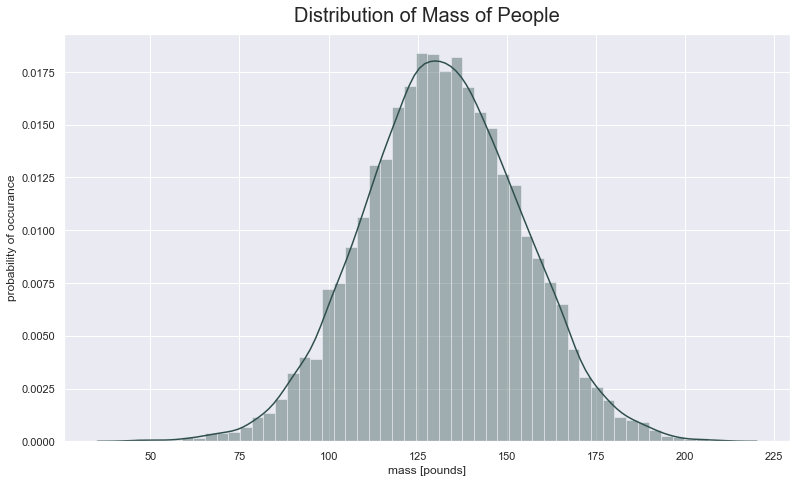

In [43]:
sns.distplot(df_ppl_mass['mass_pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]')
plt.ylabel('probability of occurance')
plt.title('Distribution of Mass of People', y=1.015, fontsize=20)

plt.show()

In [44]:
pop_mean_mass = df_ppl_mass['mass_pounds'].mean()
pop_mean_mass

131.88315049608016

In [45]:
# Calculate Population Standard Deviation 

pop_std_dev_mass = df_ppl_mass['mass_pounds'].std()
pop_std_dev_mass

22.014915553388605

In [46]:
# Sample 25 orang, 300x sample

sample_means = []
n = 25

for sample in range(0, 300): 
    # random sampling 
    sample_values = np.random.choice(a=df_ppl_mass['mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

In [47]:
sample_means

[131.10898420673567,
 132.98784209019246,
 128.84088315488054,
 139.22140077171835,
 130.43832377607725,
 128.31184726037088,
 122.36731453765051,
 133.28204161922767,
 120.40866434420681,
 131.62233309043756,
 129.55804418630035,
 128.72508033929816,
 126.6165297580697,
 130.97849463090296,
 132.33243745933723,
 125.44148559052694,
 138.23748271915198,
 131.87382407415456,
 133.95382970022564,
 138.83816897676374,
 139.69447527283054,
 128.75829233168224,
 131.49566269983345,
 129.97146205040784,
 133.1511452944675,
 134.1902006855375,
 130.68939327896024,
 125.85385147317767,
 136.16194864313505,
 130.2009201691941,
 121.12733679411289,
 132.45040782676926,
 126.9575852025019,
 131.99640377184159,
 128.3201813445207,
 132.40473945362285,
 135.06014025181008,
 132.52539052992034,
 136.98441509509726,
 134.2571486552311,
 121.73878957210158,
 136.56444131561793,
 137.86381232622006,
 130.5103126881286,
 134.77770891670244,
 125.153607563027,
 138.53614128795297,
 119.96234604826932,
 1

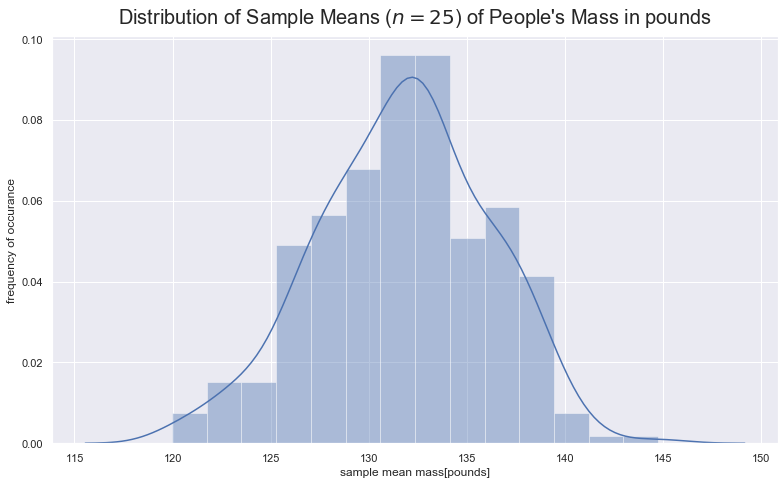

In [54]:
sns.distplot(sample_means)
plt.title('Distribution of Sample Means ($n =25$) of People\'s Mass in pounds', y=1.015, fontsize=20)
plt.xlabel("sample mean mass[pounds]")
plt.ylabel('frequency of occurance')
plt.show()

In [86]:
# Calculate Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

131.73530988010904

In [87]:
pop_mean_mass

131.88315049608016

In [88]:
# Calculate Std Dev of Sample Means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

4.336686252548053

In [89]:
# Calculate Std Error

standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

4.402983110677721

In [90]:
gym_sample_mean = 130

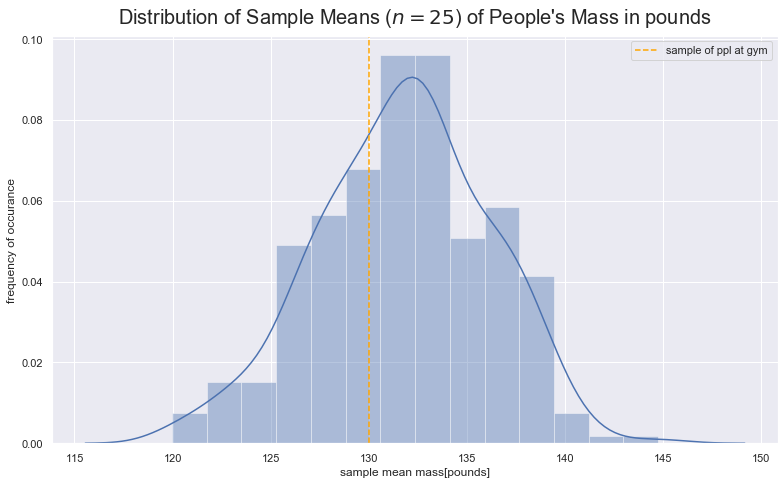

In [91]:
# Visualize gym sample means to sampling distribution

sns.distplot(sample_means)
plt.axvline(x=gym_sample_mean, linestyle='--', label='sample of ppl at gym', c='orange')
plt.title('Distribution of Sample Means ($n =25$) of People\'s Mass in pounds', y=1.015, fontsize=20)
plt.xlabel("sample mean mass[pounds]")
plt.ylabel('frequency of occurance')
plt.legend()
plt.show()

In [92]:
lower_CI = mean_of_sample_means + 1.96*standard_error

In [93]:
upper_CI = mean_of_sample_means - 1.96*standard_error

In [98]:
print(lower_CI)
print(upper_CI)

print(pop_mean_mass)

140.36515677703738
123.10546298318071
131.88315049608016


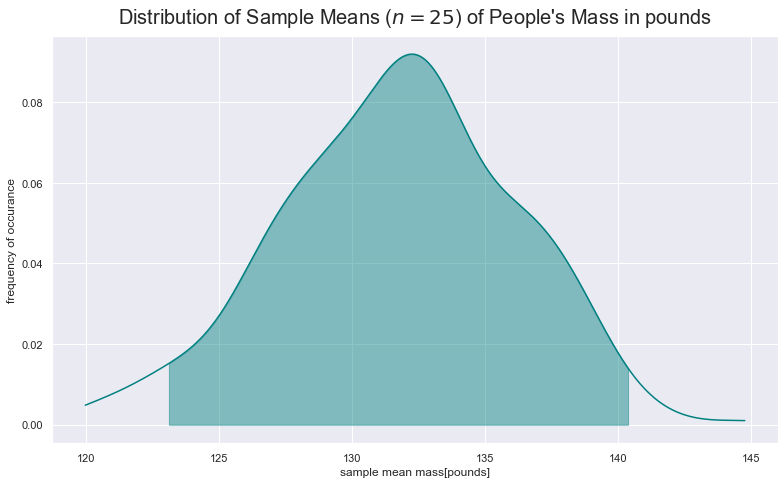

In [102]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

plt.title('Distribution of Sample Means ($n =25$) of People\'s Mass in pounds', y=1.015, fontsize=20)
plt.xlabel("sample mean mass[pounds]")
plt.ylabel('frequency of occurance')

plt.show()

In [96]:
mean_of_sample_means

131.73530988010904

# Probability Distribution

## Uniform

In [105]:
from scipy.stats import uniform

In [110]:
n = 10000
start = 10 
width = 20 
data_uniform= uniform.rvs(size=n, loc=start, scale=width)

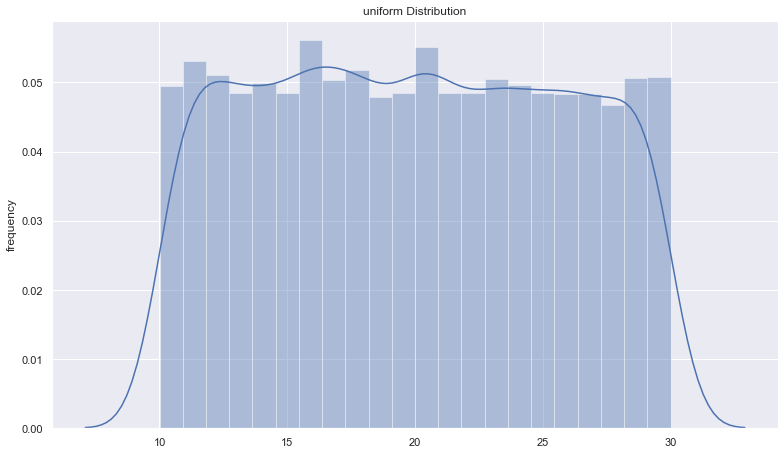

In [113]:
sns.distplot(data_uniform)
plt.title('uniform Distribution')
plt.ylabel('frequency')
plt.show()

## Bernoulli

True false dalam sekali percobaan

In [116]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

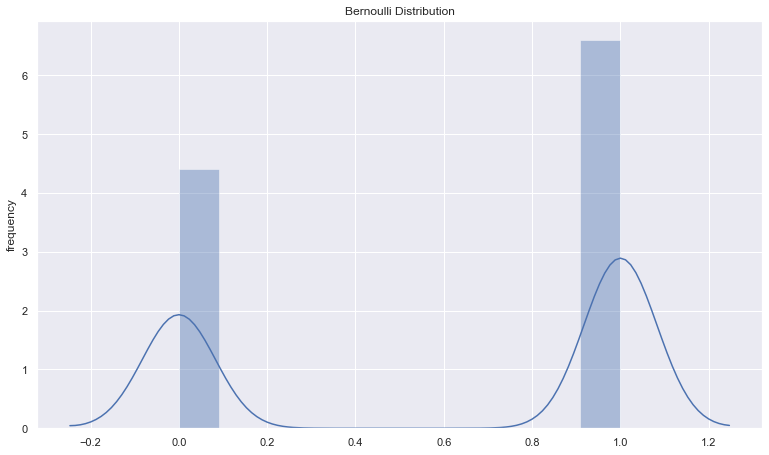

In [118]:
sns.distplot(data_bern)
plt.title('Bernoulli Distribution')
plt.ylabel('frequency')
plt.show()

## Binomial
True false dalam berkali-kali percobaan

In [119]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

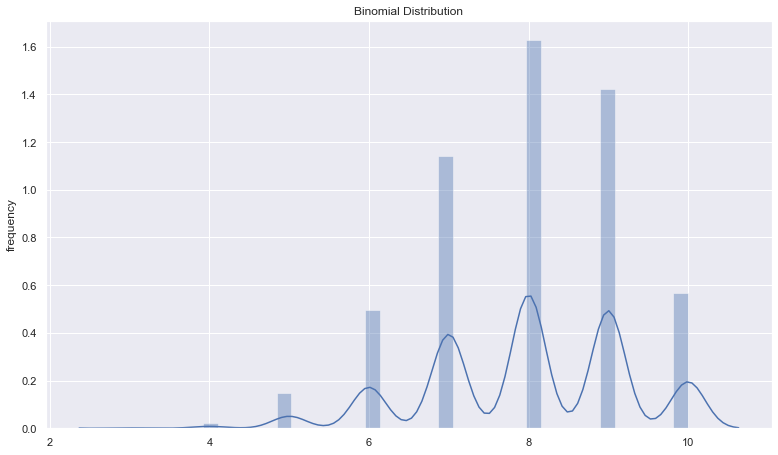

In [120]:
sns.distplot(data_binom)
plt.title('Binomial Distribution')
plt.ylabel('frequency')
plt.show()

## Poisson

In [121]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

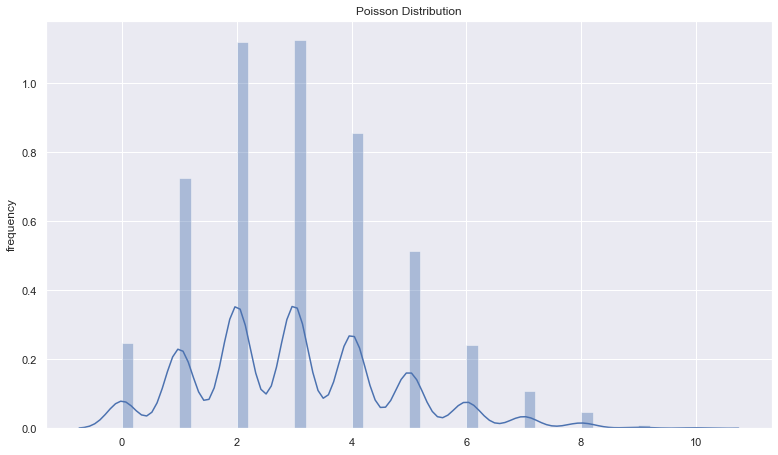

In [122]:
sns.distplot(data_poisson)
plt.title('Poisson Distribution')
plt.ylabel('frequency')
plt.show()

## Continue (Normal)

In [124]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

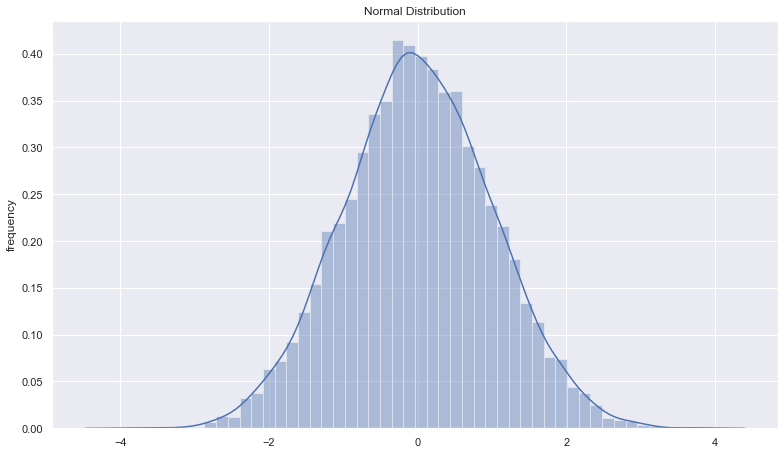

In [125]:
sns.distplot(data_normal)
plt.title('Normal Distribution')
plt.ylabel('frequency')
plt.show()

## Exponential

In [126]:
from scipy.stats import expon
data_expon = expon.rvs(size=1000, loc=0, scale=1)

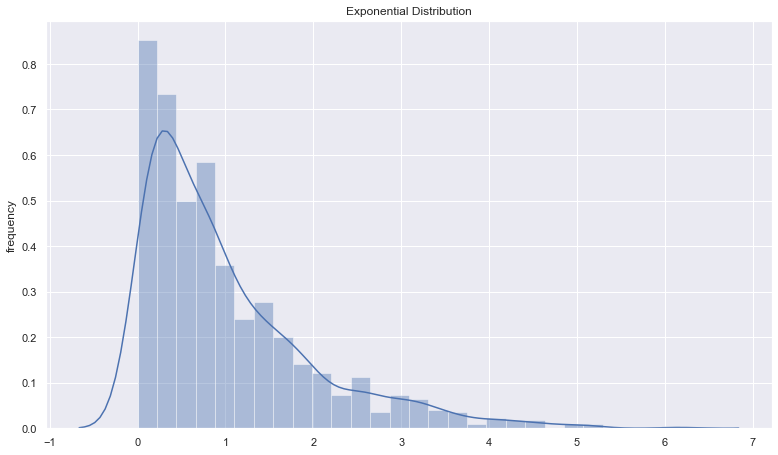

In [127]:
sns.distplot(data_expon)
plt.title('Exponential Distribution')
plt.ylabel('frequency')
plt.show()

# Hypotesis Setting

In [140]:
!pip install stasmodel

ERROR: Could not find a version that satisfies the requirement stasmodel (from versions: none)
ERROR: No matching distribution found for stasmodel


In [142]:
import statsmodels.api as sm

In [145]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [146]:
females = da[
    da["RIAGENDR"] == 2
]
male = da[
    da["RIAGENDR"] == 1
]

In [147]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [150]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [151]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

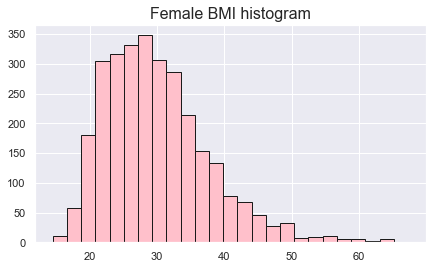

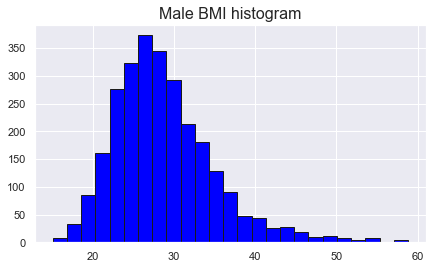

In [155]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()